# Introduction to Dataset

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
    -Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. 
    -The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average 2014-2016 life evaluations. These residuals have an average value of approximately zero over the whole set of countries.
    

Happiness Rank: A country's rank on a world scale - determined by how high their happiness score is.
Happiness Score: A score given to a country based on adding up the rankings that a population has given to each category (normalized)
Country: The country in question
Region: The region that the country belongs too (different than continent)
Economy: GDP per capita of the country - individuals rank they quality of life based on the amount they earn
Family: quality of family life, nuclear and joint family
Health: ranking healthcare availability and average life expectancy in the country
Freedom: how much an individual is able to conduct them self based on their free will
Trust: in the government to not be corrupt
Generosity: how much their country is involved in peacekeeping and global aid
Dystopia Residual: Dystopia happiness score (1.85) i.e. the score of a hypothetical country that has a lower rank than the lowest ranking country on the report, plus the residual value of each country (a number that is left over from the normalization of the variables which cannot be explained).

# Loading The Dataset

In [3]:
import pandas as pd
df=pd.read_csv("happiness_score.csv")

In [5]:
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [7]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [9]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Therefore, no data is missing.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

As we know, that we have to predict the happiness score. So, numerical variables standard error and rank & non numerical variables country and region are not required for our analysis.  

# Data Cleaning

In [12]:
df.drop(['Country','Region','Happiness Rank','Standard Error'],axis=1,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Score                158 non-null    float64
 1   Economy (GDP per Capita)       158 non-null    float64
 2   Family                         158 non-null    float64
 3   Health (Life Expectancy)       158 non-null    float64
 4   Freedom                        158 non-null    float64
 5   Trust (Government Corruption)  158 non-null    float64
 6   Generosity                     158 non-null    float64
 7   Dystopia Residual              158 non-null    float64
dtypes: float64(8)
memory usage: 10.0 KB


We will be renaming columns so as to make or analysis easier.

In [18]:
df.rename(columns={"Economy (GDP per Capita)": "Economy", "Health (Life Expectancy)": "Life Expectancy","Trust (Government Corruption)":"Corruption"},inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Happiness Score    158 non-null    float64
 1   Economy            158 non-null    float64
 2   Family             158 non-null    float64
 3   Life Expectancy    158 non-null    float64
 4   Freedom            158 non-null    float64
 5   Corruption         158 non-null    float64
 6   Generosity         158 non-null    float64
 7   Dystopia Residual  158 non-null    float64
dtypes: float64(8)
memory usage: 10.0 KB


We don't have to any missing values.

# EDA

# ScatterPlot

In [14]:
import seaborn as sns

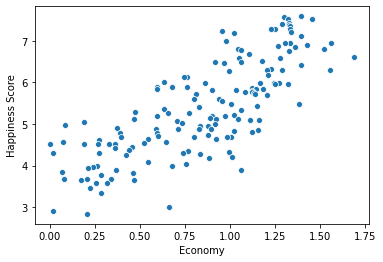

In [20]:
sns.scatterplot(x="Economy",y="Happiness Score",data=df)    #Bivariate Analysis

This implies that greater the Economy of the country greater will be thier happiness score.

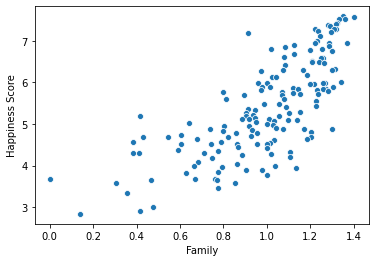

In [21]:
sns.scatterplot(x="Family",y="Happiness Score",data=df)

This implies that greater the quality of family life greater will be thier happiness score.

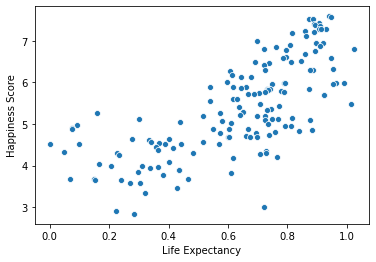

In [22]:
sns.scatterplot(x="Life Expectancy",y="Happiness Score",data=df)

Ignoring some of the outliers greater the life expectancy greater will be thier happiness score.

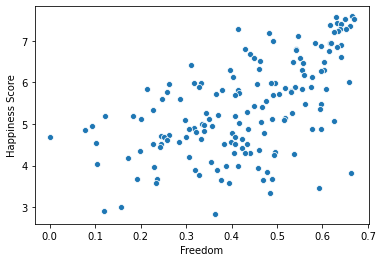

In [23]:
sns.scatterplot(x="Freedom",y="Happiness Score",data=df)

The plot is not equally distributed in the graph.

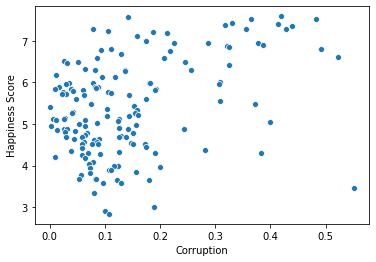

In [24]:
sns.scatterplot(x="Corruption",y="Happiness Score",data=df)

We can observe that in most of the countries lesser the corruption the higher will be the happiness score.

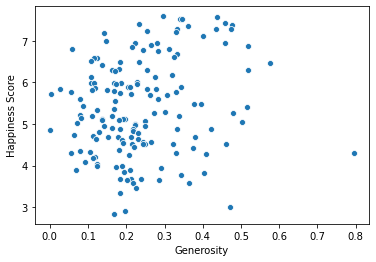

In [25]:
sns.scatterplot(x="Generosity",y="Happiness Score",data=df)

The plot is unevenly distributed.

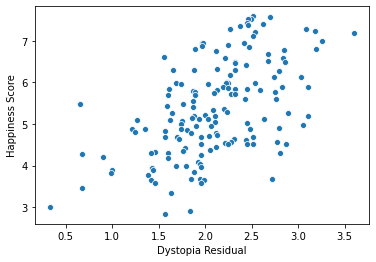

In [27]:
sns.scatterplot(x="Dystopia Residual",y="Happiness Score",data=df)

Most of the countries in lie between the residual score 1.5-3.0. 

# Correlation

In [28]:
df.corr()

,Happiness Score,Economy,Family,Life Expectancy,Freedom,Corruption,Generosity,Dystopia Residual
Happiness Score,1.000000,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Economy,0.780966,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Life Expectancy,0.724200,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Corruption,0.395199,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


#-Variables affecting the Happiness Score most:
##1.Economy
##2.Family
##3.Life Expectancy
#-Variables affecting the Happiness Score mildly:
##1.Freedom
##2.Dystopia Residual
##3.Corruption
#-Variables affecting the Happiness Score least:
##1.Generosity






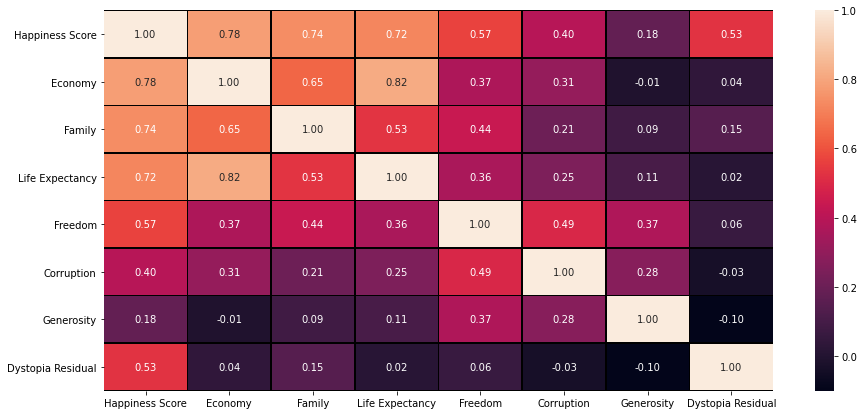

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor="black",fmt=".2f")

# Describing Datasets

In [30]:
df.describe()

,Happiness Score,Economy,Family,Life Expectancy,Freedom,Corruption,Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


As the difference between mean and median is not that great. This implies that there won't be much ouliers present in the data. 

# Outliers Checking

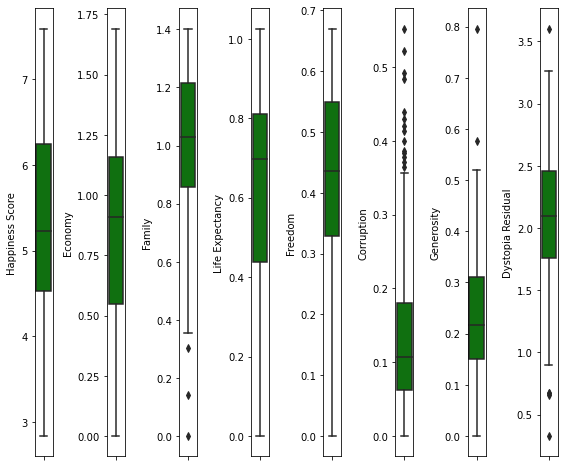

In [31]:
collist=df.columns.values   #Univariate Analysis
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

We can observe that most of the outliers are present in corruption variable of data.

# Skewness

In [32]:
df.skew()

Happiness Score      0.097769
Economy             -0.317575
Family              -1.006893
Life Expectancy     -0.705328
Freedom             -0.413462
Corruption           1.385463
Generosity           1.001961
Dystopia Residual   -0.238911
dtype: float64

# Normal Distribution Curve

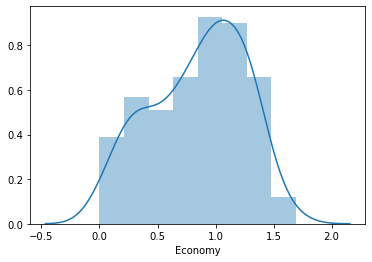

In [33]:
sns.distplot(df["Economy"])

Economy is not normally distributed.

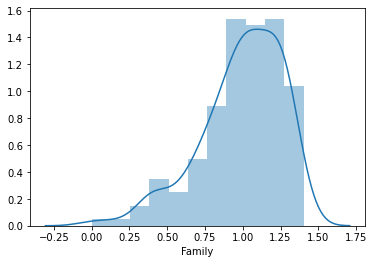

In [34]:
sns.distplot(df["Family"])

Family is not normally distributed.

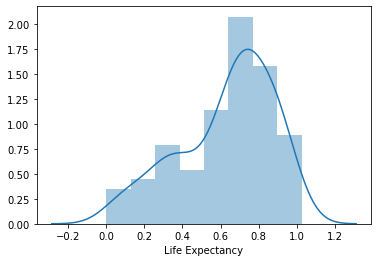

In [35]:
sns.distplot(df["Life Expectancy"])

Life Expectancy is not normally distributed.

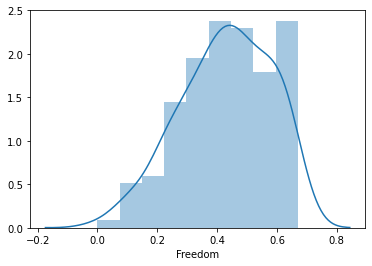

In [37]:
sns.distplot(df["Freedom"])

Freedom is not normally distributed.

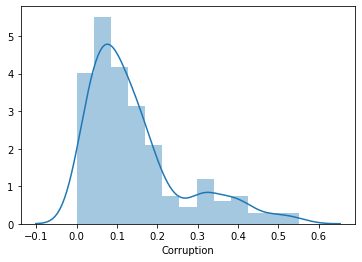

In [38]:
sns.distplot(df["Corruption"])

Corruption is not normally distributed.

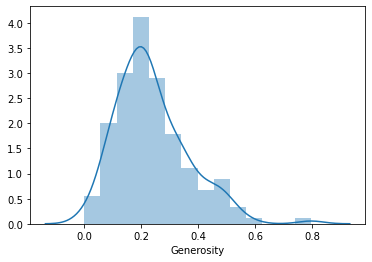

In [39]:
sns.distplot(df["Generosity"])

Generosity is not normally distributed.

# Removing Outliers

In [41]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(158, 8)

In [42]:
threshold=3
print(np.where(z>3))

(array([ 27, 128, 147, 153, 155, 157], dtype=int64), array([5, 6, 2, 5, 7, 2], dtype=int64))


In [43]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(158, 8)
(152, 8)


# Percentage Data Loss

In [44]:
loss=(158-152)/158*100
print("Total data loss in % = ",loss)

Total data loss in % =  3.79746835443038


# Transforming data to remove skewness

In [45]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

In [46]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

# Scaling

In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.83870731,  1.49611066,  1.66761863, ...,  1.76230969,
         1.82206989,  0.65595135],
       [ 1.81883275,  1.19771755,  2.02101055, ...,  1.44688503,
         0.35523025,  1.57166845],
       [ 1.79278922,  1.27024567,  1.74015288, ...,  1.6221701 ,
         1.95457488,  0.97742359],
       ...,
       [-1.79965538, -1.35114937, -2.09149028, ..., -1.27152318,
        -0.16357633,  1.13659521],
       [-2.06377822, -1.41833371, -2.01503268, ...,  0.3154582 ,
        -0.40394411, -0.32359556],
       [-2.5758828 , -1.91827055, -1.91154627, ..., -1.85450203,
        -0.11827784, -0.18319784]])

# Now as we know that our target varible is continuous therefore we will be using regression technique.

In [57]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,r2_score

In [53]:
from sklearn.linear_model import LinearRegression
best_rstate=0
accu=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=r2_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
print(f"Best accuracy {accu*100} found on random state {best_rstate}")

Best accuracy 98.1531884644808 found on random state 16


# Splitting the data

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=16,test_size=0.20)

# Finding the Best Model

Linear Regression

SVC with kernels rbf and poly

In [60]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
cvs=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
print("Accuracy = ",r2_score(y_test,predlr)*100)
print("Cross_val_score = ",cvs*100)

Accuracy =  98.04718245053117
Cross_val_score =  92.25959731658453


# Ensemble Methods

RandomForestRegressor

In [62]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)
predlr=rfr.predict(x_test)
cvs=cross_val_score(RandomForestRegressor(),x_train,y_train,cv=5).mean()
print("Accuracy = ",r2_score(y_test,predrfr)*100)
print("Cross_val_score = ",cvs*100)

Accuracy =  53.03085042780751
Cross_val_score =  61.79741516777943


AdaBoostRegressor

In [63]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
abr.score(x_train,y_train)
predabr=abr.predict(x_test)f
cvs=cross_val_score(AdaBoostRegressor(),x_train,y_train,cv=5).mean()
print("Accuracy = ",r2_score(y_test,predabr)*100)
print("Cross_val_score = ",cvs*100)

Accuracy =  48.21912170652091
Cross_val_score =  56.02622785773186


SGDRegressor

In [66]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
sgd.fit(x_train,y_train)
sgd.score(x_train,y_train)
predsgd=sgd.predict(x_test)
cvs=cross_val_score(SGDRegressor(),x_train,y_train,cv=5).mean()
print("Accuracy = ",r2_score(y_test,predsgd)*100)
print("Cross_val_score = ",cvs*100)

Accuracy =  81.30328294820595
Cross_val_score =  72.5828419388678


# Here, we come to a conclusion that LinearRegression model has the best accuracy and the cross val score therefore we will be choosing this model for predication of happiness scores. 

# As we got an accuracy of 98% therefore we will not to tuning it further.

# Serialization

In [67]:
import joblib
joblib.dump(LinearRegression(),"Happiness_Score.pkl")

['Happiness_Score.pkl']